In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('student_admission.csv')
df.head(10)

,Entrance_Exam_Score,Undergraduate_GPA,Work_Experience,Admission_Status
0,78,7.56,Yes,0
1,91,7.51,No,0
2,68,8.99,Yes,0
3,54,8.25,Yes,0
4,82,8.51,Yes,0
5,47,8.98,No,0
6,60,9.45,No,0
7,78,6.69,Yes,0
8,97,6.88,No,0
9,58,5.47,Yes,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entrance_Exam_Score  500 non-null    int64  
 1   Undergraduate_GPA    500 non-null    float64
 2   Work_Experience      500 non-null    object 
 3   Admission_Status     500 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB


In [28]:
df.shape

(500, 4)

In [29]:
df.nunique()

Entrance_Exam_Score     60
Undergraduate_GPA      327
Work_Experience          2
Admission_Status         2
dtype: int64

In [30]:
df.describe()

,Entrance_Exam_Score,Undergraduate_GPA,Admission_Status
count,500.000000,500.000000,500.000000
mean,70.396000,7.462980,0.006000
std,17.335982,1.466523,0.077304
min,40.000000,5.050000,0.000000
25%,56.750000,6.197500,0.000000
50%,71.000000,7.480000,0.000000
75%,85.000000,8.752500,0.000000
max,99.000000,10.000000,1.000000


In [31]:
df.isnull().sum()

Entrance_Exam_Score    0
Undergraduate_GPA      0
Work_Experience        0
Admission_Status       0
dtype: int64

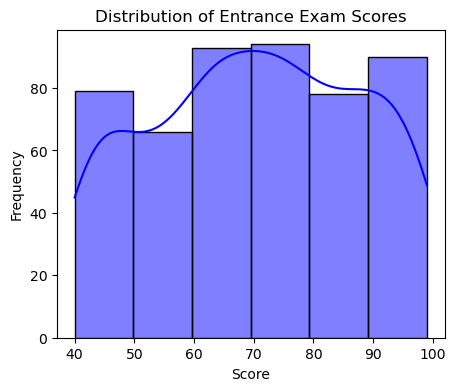

In [32]:
plt.figure(figsize=(5, 4))
sns.histplot(df['Entrance_Exam_Score'], bins=6, kde=True, color='blue')
plt.title('Distribution of Entrance Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

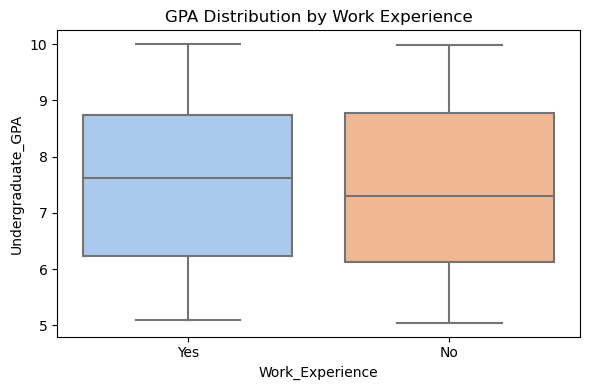

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Work_Experience', y='Undergraduate_GPA', data=df, palette='pastel')
plt.title('GPA Distribution by Work Experience')
plt.tight_layout()
plt.show()

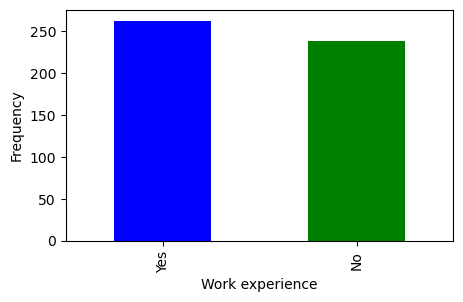

In [34]:
plt.figure(figsize = (5,3))
df.Work_Experience.value_counts().plot.bar(color=['blue','green']);
plt.xlabel("Work experience")
plt.ylabel("Frequency")
plt.show()

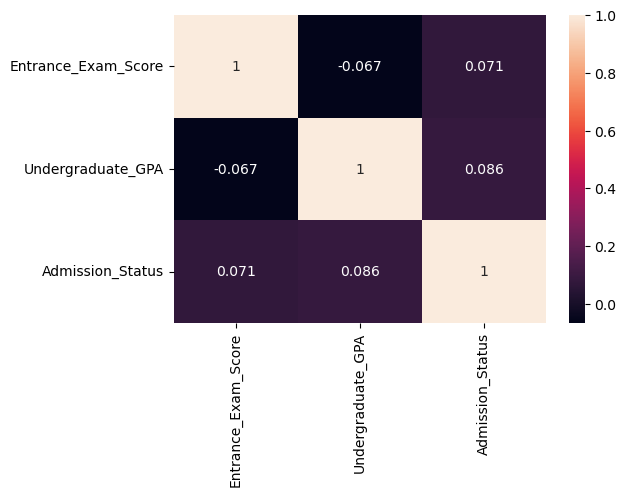

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Work_Experience'] = label_encoder.fit_transform(df['Work_Experience'])

In [37]:
df.tail(5)

,Entrance_Exam_Score,Undergraduate_GPA,Work_Experience,Admission_Status
495,89,9.11,1,1
496,64,5.55,0,0
497,63,9.23,0,0
498,52,5.64,0,0
499,99,6.99,1,0


In [38]:
x = df.drop("Admission_Status", axis=1)
y = df["Admission_Status"] 

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((350, 3), (150, 3), (350,), (150,))

Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [41]:
print("Training Accuracy :", lr.score(x_train, y_train))
print("Testing Accuracy :", lr.score(x_test, y_test))

Training Accuracy : 0.9971428571428571
Testing Accuracy : 0.9866666666666667


Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
print("Training Accuracy :", dt.score(x_train, y_train))
print("Testing Accuracy :", dt.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9866666666666667
